OOV: out of vocabularty
p(w_o) = constant > pr(w_1)

smooth problem

In [54]:
"""adj* => adj* adj | adj null"""

import random

def adj(): return random.choice('beautiful | handsome | strange'.split("|")).split()[0]


# def adj_star():
#     return random.choice(['', adj() + adj_star() ])



def adj_star():
     return random.choice([lambda : "", lambda : adj() + adj_star()])()
    
#  the last brakets stands from "to run", and only when the selection has selected the ajd compount, it will continue


adj_star()

''

In [62]:
numbers = [1, -2, -3, -4, 5, 6, 9, -10]


def absolute(number):
    if number < 0:
        return number* -1
    else:
        return number
    
# absolute(-11)


sorted(numbers, key = absolute)

[1, -2, -3, -4, 5, 6, 9, -10]

In [65]:
# def mod_5(number):
#     return number % 5

numbers = [1, -2, -3, -4, 5, 6, 9, -10]

sorted(numbers, key = lambda x: x % 5)

# mod_5(6)

[5, -10, 1, -4, 6, -3, -2, 9]

In [66]:
city_location = {
    'Hongkong' : (114.17, 22.28)
}

city_location

{'Hongkong': (114.17, 22.28)}

In [92]:
import re

city_location = "{name: 'Hongkong', geocode:[114.17, 22.28]}"

city = r"name: '(\w+)'"
geocode = r"geocode:\[(\d+.\d+),\s(\d+.\d+)\]"

re.findall(geocode, city_location)

[('114.17', '22.28')]

北京🚗->太原🚗->西安🚗->长沙🚗->福州


D:\Python\Anaconda\ancd\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
D:\Python\Anaconda\ancd\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
D:\Python\Anaconda\ancd\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
D:\Python\Anaconda\ancd\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0

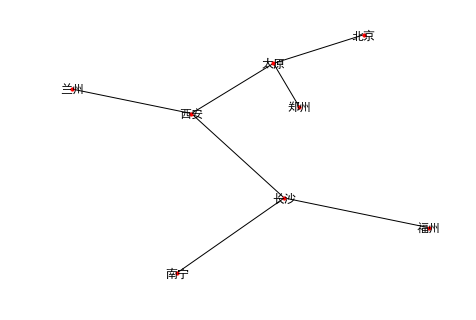

In [5]:
import re
import math
import networkx as nx
import matplotlib.pyplot as plt


coordination_source ="""
{name:'兰州', geoCoord:[103.73, 36.03]},
{name:'嘉峪关', geoCoord:[98.17, 39.47]},
{name:'西宁', geoCoord:[101.74, 36.56]},
{name:'成都', geoCoord:[104.06, 30.67]},
{name:'石家庄', geoCoord:[114.48, 38.03]},
{name:'拉萨', geoCoord:[102.73, 25.04]},
{name:'贵阳', geoCoord:[106.71, 26.57]},
{name:'武汉', geoCoord:[114.31, 30.52]},
{name:'郑州', geoCoord:[113.65, 34.76]},
{name:'济南', geoCoord:[117, 36.65]},
{name:'南京', geoCoord:[118.78, 32.04]},
{name:'合肥', geoCoord:[117.27, 31.86]},
{name:'杭州', geoCoord:[120.19, 30.26]},
{name:'南昌', geoCoord:[115.89, 28.68]},
{name:'福州', geoCoord:[119.3, 26.08]},
{name:'广州', geoCoord:[113.23, 23.16]},
{name:'长沙', geoCoord:[113, 28.21]},
{name:'海口', geoCoord:[110.35, 20.02]},
{name:'沈阳', geoCoord:[123.38, 41.8]},
{name:'长春', geoCoord:[125.35, 43.88]},
{name:'哈尔滨', geoCoord:[126.63, 45.75]},
{name:'太原', geoCoord:[112.53, 37.87]},
{name:'西安', geoCoord:[108.95, 34.27]},
{name:'台湾', geoCoord:[121.30, 25.03]},
{name:'北京', geoCoord:[116.46, 39.92]},
{name:'上海', geoCoord:[121.48, 31.22]},
{name:'重庆', geoCoord:[106.54, 29.59]},
{name:'天津', geoCoord:[117.2, 39.13]},
{name:'呼和浩特', geoCoord:[111.65, 40.82]},
{name:'南宁', geoCoord:[108.33, 22.84]},
{name:'西藏', geoCoord:[91.11, 29.97]},
{name:'银川', geoCoord:[106.27, 38.47]},
{name:'乌鲁木齐', geoCoord:[87.68, 43.77]},
{name:'香港', geoCoord:[114.17, 22.28]},
{name:'澳门', geoCoord:[113.54, 22.19]}
"""

pattern = re.compile(r"name:'(\w+)',\s+geoCoord:\[(\d+.\d+),\s(\d+.\d+)\]")

# def city_location(city, long, lat):
#     return ""join.(city, long, lat)

city_location = {}
cities = []
for line in coordination_source.split("\n"):
    city_info = pattern.findall(line)
#     print(city_info)
    if not city_info: continue
#     print(city_info[0])
#      city = city_info[0][0]
#      long = city_info[0][1]
#      lat = city_info[0][2]
#      city_location(city, long, lat)

    city, long, lat = city_info[0]
    cities.append(city)
    
#     print(type(city))
#     cities = list(str(city))
#     print(cities)

# city_location
    long, lat = float(long), float(lat)
    city_location[city] = (long, lat)        

# print(cities)

def geo_distance(origin, destination):
    lat1, lon1 = origin
    lat2, lon2 = destination
    
    radius = 6371
    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) + math.cos(math.radians(lat1) * math.cos(math.radians(lat2))) * math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c
    
    return d

def get_geo_distance(city1, city2):
#     for c in [city1, city2]:
# #         print(type([city1, city2]))
# #         print(cities)
    if city1 in cities and city2 in cities: 
        return geo_distance(city_location[city1], city_location[city2])
    else:
        print("输入超出我的理解范围")

# get_geo_distance("上海", "保定")

cities_plot = list(city_location.keys())

city_graph = nx.Graph()
# city_graph.add_nodes_from(city_location.keys())
#  to add goo coords in  as nodes
city_graph.add_nodes_from(cities_plot)
%matplotlib inline
#  to draw nodes on the plot

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
# nx.draw(city_graph, city_location, with_labels = True, node_size = 30)

# with labels = True to have multi labels


simple_connection_info = {
    '北京' : ['太原'],
    '太原' : ['北京', '西安', '郑州'],
    '郑州' : ['太原'],
    '西安' : ['兰州', '长沙'],
    '长沙' : ['福州', '南宁'],
    '兰州' : ['西安']
}

# simple_connection_info['西安']
nx.draw(nx.Graph(simple_connection_info), city_location, with_labels= True, node_size=10)
    
    

def search(city1, city2, connection_graph):
    pathes = [[city1]]

    visited = set()
    
    while pathes:
#         print(pathes)
        path = pathes.pop(0)
#         print(path)
        froninter = path[-1]

        if froninter in visited: continue
            
        successors =  connection_graph[froninter]
        
        for city in successors:
            
            if city in path: continue
#                 to eliminate loop
            new_path = path + [city]
            
            pathes.append(new_path)

            if city == city2: return new_path
       
        visited.add(froninter)   
#         print(visited)


def pretty_print(cities):
    print('🚗->'.join(cities))
    
pretty_print(search('北京', '福州', simple_connection_info))

breadth first search

In [32]:
a = ['1', '2', '3']
b = a.pop()
print(b)
print(a)

3
['1', '2']


In [8]:
simple_connection_info = {
    '北京' : ['太原'],
    '太原' : ['北京', '西安', '郑州'],
    '郑州' : ['西安','长沙'],
    '西安' : ['兰州', '长沙'],
    '长沙' : ['福州'],
    '兰州' : ['西安'],
    '福州' : ['长沙']
}


def bfs(graph, start):
    
    visited = [start]
#     visited = ['pk']
    seen = set()
#     seen = set()
    
    while visited:
        frontier =  visited.pop()
#         frontier = ['pk']
#         visited = []
        
        if frontier in seen: continue
            
        for successor in graph[frontier]:
#             print(successor)
#             graph['pk'] = successor = ['ty']
            visited.append(successor)
#             visited.append('TY')
#             visited = ['ty']
#             print(visited)
#             print("===")
        seen.add(frontier)
#         seen = ('pk')
        
    return visited


bfs(simple_connection_info, '北京')            

[]

In [20]:
#  Breadth First Search

from collections import defaultdict

simple_connection_info = {
    '北京' : ['太原','沈阳'],
    '太原' : ['北京', '西安', '郑州'],
    '郑州' : ['太原'],
    '西安' : ['兰州', '长沙'],
    '长沙' : ['福州', '南宁'],
    '兰州' : ['西安']
}

simple_connection_info_src = defaultdict(list)
simple_connection_info.update(simple_connection_info_src)


def bfs(graph, city):
#     given a connection graph and a start point,we want to have all the connections

    visited = [city]
    seen = set()
    
    while visited:
        frontier = visited.pop()
        
        if frontier in seen: continue
            
        for successor in graph[frontier]:
            if successor in seen: continue
            print(successor)
            visited.append(successor)
            
        seen.add(frontier)
    return seen

bfs(simple_connection_info, "太原")

北京
西安
郑州
兰州
长沙
福州
南宁


KeyError: '南宁'

In [28]:
# Depth First Search


from collections import defaultdict

simple_connection_info = {
    '1' : ['2','3'],
    '2' : ['1','4'],
    '4' : ['2','6'],
    '3' : ['1','5'],
    '5' : ['3','7'],
    '6' : ['4'],
    '7' : ['5']
}

simple_connection_info_src = defaultdict(list)
simple_connection_info.update(simple_connection_info_src)


def bfs(graph, city):
#     given a connection graph and a start point,we want to have all the connections

    visited = [city]
    seen = set()
    
    while visited:
        frontier = visited.pop()
        
        if frontier in seen: continue
            
        for successor in graph[frontier]:
            if successor in seen: continue
            print(successor)
#             visited.append(successor)
            visited = visited + [successor]
#         to expand new elements
# 1-23-57-46,即深度优先
#             visited = [successsor] + visite
#         to expand the already ditected elements
# 1-23-45-67，即广度优先
    
            
        seen.add(frontier)
    return visited

bfs(simple_connection_info, "1")

2
3
5
7
4
6


[]

['北京', '石家庄', '武汉', '福州']
['北京', '合肥', '福州']


D:\Python\Anaconda\ancd\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
D:\Python\Anaconda\ancd\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
D:\Python\Anaconda\ancd\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
D:\Python\Anaconda\ancd\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0

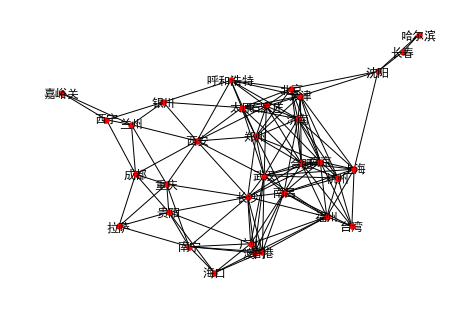

In [49]:
import re
import math
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict


coordination_source ="""
{name:'兰州', geoCoord:[103.73, 36.03]},
{name:'嘉峪关', geoCoord:[98.17, 39.47]},
{name:'西宁', geoCoord:[101.74, 36.56]},
{name:'成都', geoCoord:[104.06, 30.67]},
{name:'石家庄', geoCoord:[114.48, 38.03]},
{name:'拉萨', geoCoord:[102.73, 25.04]},
{name:'贵阳', geoCoord:[106.71, 26.57]},
{name:'武汉', geoCoord:[114.31, 30.52]},
{name:'郑州', geoCoord:[113.65, 34.76]},
{name:'济南', geoCoord:[117, 36.65]},
{name:'南京', geoCoord:[118.78, 32.04]},
{name:'合肥', geoCoord:[117.27, 31.86]},
{name:'杭州', geoCoord:[120.19, 30.26]},
{name:'南昌', geoCoord:[115.89, 28.68]},
{name:'福州', geoCoord:[119.3, 26.08]},
{name:'广州', geoCoord:[113.23, 23.16]},
{name:'长沙', geoCoord:[113, 28.21]},
{name:'海口', geoCoord:[110.35, 20.02]},
{name:'沈阳', geoCoord:[123.38, 41.8]},
{name:'长春', geoCoord:[125.35, 43.88]},
{name:'哈尔滨', geoCoord:[126.63, 45.75]},
{name:'太原', geoCoord:[112.53, 37.87]},
{name:'西安', geoCoord:[108.95, 34.27]},
{name:'台湾', geoCoord:[121.30, 25.03]},
{name:'北京', geoCoord:[116.46, 39.92]},
{name:'上海', geoCoord:[121.48, 31.22]},
{name:'重庆', geoCoord:[106.54, 29.59]},
{name:'天津', geoCoord:[117.2, 39.13]},
{name:'呼和浩特', geoCoord:[111.65, 40.82]},
{name:'南宁', geoCoord:[108.33, 22.84]},
{name:'西藏', geoCoord:[91.11, 29.97]},
{name:'银川', geoCoord:[106.27, 38.47]},
{name:'乌鲁木齐', geoCoord:[87.68, 43.77]},
{name:'香港', geoCoord:[114.17, 22.28]},
{name:'澳门', geoCoord:[113.54, 22.19]}
"""

pattern = re.compile(r"name:'(\w+)',\s+geoCoord:\[(\d+.\d+),\s(\d+.\d+)\]")

# def city_location(city, long, lat):
#     return ""join.(city, long, lat)

city_location = {}
cities = []
for line in coordination_source.split("\n"):
    city_info = pattern.findall(line)
#     print(city_info)
    if not city_info: continue
#     print(city_info[0])
#      city = city_info[0][0]
#      long = city_info[0][1]
#      lat = city_info[0][2]
#      city_location(city, long, lat)

    city, long, lat = city_info[0]
    cities.append(city)
    
#     print(type(city))
#     cities = list(str(city))
#     print(cities)

# city_location
    long, lat = float(long), float(lat)
    city_location[city] = (long, lat)        

# print(cities)

def geo_distance(origin, destination):
    lat1, lon1 = origin
    lat2, lon2 = destination
    
    radius = 6371
    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) + math.cos(math.radians(lat1) * math.cos(math.radians(lat2))) * math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c
    
    return d

def get_geo_distance(city1, city2):
#     for c in [city1, city2]:
# #         print(type([city1, city2]))
# #         print(cities)
    if city1 in cities and city2 in cities: 
        return geo_distance(city_location[city1], city_location[city2])
    else:
        print("输入超出我的理解范围")

# get_geo_distance("上海", "保定")

# cities_plot = list(city_location.keys())

# city_graph = nx.Graph()
# city_graph.add_nodes_from(city_location.keys())
#  to add goo coords in  as nodes
# city_graph.add_nodes_from(cities_plot)
# %matplotlib inline
#  to draw nodes on the plot

# plt.rcParams['font.sans-serif'] = ['SimHei']
# plt.rcParams['axes.unicode_minus'] = False
# nx.draw(city_graph, city_location, with_labels = True, node_size = 30)

# with labels = True to have multi labels


threshold = 800
city_conntection = defaultdict(list)

for c1 in city_location:
    for c2 in city_location:
        if c1 == c2: continue
            
        distance = get_geo_distance(c1, c2)
        
        if distance < threshold:
            if c2 in city_conntection[c1]: continue
            city_conntection[c1].append(c2)
            if c1 in city_conntection[c2]: continue
            city_conntection[c2].append(c1)

# city_conntection
city_with_road = nx.Graph(city_conntection)
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
nx.draw(city_with_road, city_location, with_labels = True, node_size = 30)


def search(city1, city2, connection_graph, sort_candidate):
    pathes = [[city1]]

    visited = set()
    
    while pathes:
#         print(pathes)
        path = pathes.pop(0)
#         print(path)
        froninter = path[-1]

        if froninter in visited: continue
            
        successors =  connection_graph[froninter]
        
        for city in successors:
            
            if city in path: continue
#                 to eliminate loop
            new_path = path + [city]
            
            pathes.append(new_path)

            if city == city2: return new_path
       
        visited.add(froninter)   
        
        
#         print(visited)

        pathes =  sort_candidate(pathes)
    
def transfer_station_first(pathes):
    return sorted(pathes, key = len, reverse =  True)

def shortest_path_first(pathes):
    if len(pathes) <= 1 : return pathes
    def get_path_distances(path):
        distance = 0
        for station in path[:-1]:
            distance += get_geo_distance(station, path[-1])
        return distance
    return sorted(pathes, key = get_path_distances)    
    # city_conntection
print(search('北京', '福州', city_conntection, sort_candidate = transfer_station_first))
print(search('北京', '福州', city_conntection, sort_candidate = shortest_path_first))



In [34]:
import requests
import re

url = 'https://movie.douban.com/subject/26931786/?from=showing'

response = requests.get(url)
# print(response)
pattern = re.compile(r'\<a href="https://movie\.douban\.com/subject/\d+/?from=subject-page" class="" >')

likes = pattern.findall(response)

for like in likes:
    print(like)

TypeError: expected string or bytes-like object

In [96]:
from sklearn.datasets import load_boston
import random
# import


data = load_boston()
# help(load_boston)
X, y = data['data'], data['target']

# X[1]
# y[1]

# data['feature_names']
# data['DESCR']

# len(X[:, 0])
%matplotlib inline
# plt.scatter(X[:, 0], y)

def draw_rm_and_price():
    plt.scatter(X[:, 5], y)

def price(rm, k, b):
    return rm * k + b

k = random.randint(-100, 100)
b = random.randint(-100, 100)

X_rm =  X[:, 5]

price_by_random_k_and_b = [price(r, k, b) for r in X_rm]

# draw_rm_and_price()
# plt.scatter(X_rm, price_by_random_k_and_b)

list(y)
price_by_random_k_and_b

def loss(y, y_hat):
    return sum((y_i - y_hat_i) ** 2 for y_i, y_hat_i in zip(list(y), list(y_hat)))/ len(list(y))

# loss([1,1,4],[1,1,3])

try_times = 100
min_loss = float('inf')
best_k, best_b = None, None


for I in range(try_times):

    k = random.randint(-100, 100)
    b = random.randint(-100, 100)
    price_by_random_k_and_b = [price(r, k, b) for r in X_rm]
    
    current_loss = loss(y, price_by_random_k_and_b)
#     print(current_loss)
    
    if current_loss < min_loss:
        min_loss = current_loss
        best_k, best_b = k, b
    print(current_loss)
    print("k = " + str(k))
    print("b = " + str(b))
    
    
    

70820.72042004543
k = -37
b = -9
20412.3508892648
k = -12
b = -44
2862.7588427509886
k = -16
b = 73
163588.93577307308
k = 55
b = 80
5948.570146575105
k = 31
b = -97
218071.2498117452
k = 63
b = 92
42035.09054999999
k = -30
b = 8
50135.32293669366
k = -19
b = -81
54443.73476318581
k = -26
b = -46
296323.47656926257
k = 99
b = -59
38842.538533088926
k = 37
b = -14
66825.98360928855
k = 30
b = 92
307829.6337619605
k = -96
b = 76
244967.4744275237
k = -79
b = 28
554.0577521501975
k = 2
b = 32
193366.59146060862
k = 62
b = 71
10941.570639106718
k = -2
b = -69
41760.38961079647
k = 23
b = 82
512227.5309951614
k = -96
b = -86
72078.44190962058
k = -38
b = -5
30062.49292154155
k = -30
b = 40
314994.44050206896
k = 99
b = -42
69080.7346387352
k = 40
b = 33
52073.19528965811
k = -31
b = -9
13620.80718396642
k = -11
b = -24
48880.674357911106
k = 43
b = -28
191398.57484246633
k = -52
b = -86
27727.046782179834
k = -17
b = -36
97047.78176516789
k = -55
b = 60
8717.508992031626
k = -12
b = 6
18768

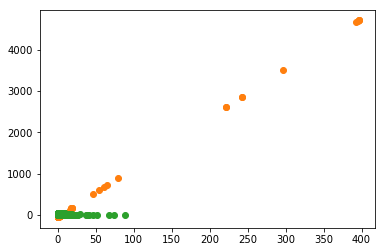

In [13]:
from sklearn.datasets import load_boston
import random
import matplotlib.pyplot as plt


trying_time = 100
data = load_boston()
X, y = data['data'], data['target']
min_loss = float('inf')
best_k, best_b = None, None
X_rm =  X[:, 5]


def price(rm, k, b):
    return rm * k + b


def loss(y, y_hat):
    return sum((y_i - y_hat_i) ** 2 for y_i, y_hat_i in zip(list(y), list(y_hat)))/ len(list(y))

for i in range(trying_time):
    k = random.randint(-100, 100)
    b = random.randint(-100, 100)
    
    price_by_random_k_and_random_b = [price (r, k, b) for r in X_rm]
    
    current_loss = loss(y, price_by_random_k_and_random_b)
    
    if current_loss < min_loss:
        min_loss = current_loss
        best_k, best_b =  k, b
#         print('Get best_k:{} best_b: {}, and the less is: {}'.format(best_k, best_b, min_loss))
        
        
        
X_rm = X[:5]
k = 12
b = -49

def draw_rm_and_price():
    plt.scatter(X[:, 5], y)

price_by_random_k_and_random_b = [price(r, k, b) for r in X_rm]
%matplotlib inline
draw_rm_and_price()
plt.scatter(X_rm, price_by_random_k_and_random_b)
plt.scatter(X[:, 0], y)


# direction adjusting

In [ ]:
from sklearn.datasets import load_boston
import random
import matplotlib.pyplot as plt

X, y = data['data'], data['target']
X_rm = X[:5]

trying_times = 10000

min_loss = float('inf')
best_k, best_b = None, None

best_k = random.random() *200 - 100
best_b = random.random() *200 - 100

direction = [
#     +1  is increase, -1 is decrease
    (+1, -1),
    (+1, +1),
    (-1, -1),
    (-1, +1)
]

next_direction = random.choice(direction)

scalar = 0.1

def price(rm, k, b):
    return rm * k + b

def loss(y, y_hat):
    return sum((y_i - y_hat_i) ** 2 for y_i, y_hat_i in zip(list(y), list(y_hat)))/ len(list(y))

for i in range(trying_times):
    k_direction, b_direction = next_direction
    current_k, current_b = best_k + k_direction * scalar, best_b + b_direction * scalar
    price_by_k_and_b = [price(r, current_k, current_b) for r in X_rm]
    current_loss = loss(y, price_by_k_and_b)
    
    if current_loss < min_loss:
        min_loss = current_loss
        best_k, best_b =  current_k, current_b
        
        next_direction = current_direction
        print('Get best_k:{} best_b: {}, and the less is: {}'.format(best_k, best_b, min_loss))
    else:
        next_direction = random.choice(direction)
    

# 监督学习
找对对的方向
监督变化，并继续学习